In [154]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import cross_val_score

In [2]:
data=pd.read_csv("Train.csv")
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
data.shape

(891, 12)

In [4]:
Titanic_data=data.copy()

In [5]:
Titanic_data=Titanic_data.set_index("PassengerId")
Titanic_data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
Titanic_data.drop(columns=["Name","Ticket","Cabin"],inplace=True)

In [7]:
Titanic_data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,,,
1,0,3,male,22.0,1,0,7.2500,S
2,1,1,female,38.0,1,0,71.2833,C
3,1,3,female,26.0,0,0,7.9250,S
4,1,1,female,35.0,1,0,53.1000,S
5,0,3,male,35.0,0,0,8.0500,S


In [8]:
Titanic_data["Sex"]=pd.get_dummies(data=Titanic_data.Sex)
#male=0,female=1

In [9]:
Titanic_data

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,,,
1,0,3,0,22.0,1,0,7.2500,S
2,1,1,1,38.0,1,0,71.2833,C
3,1,3,1,26.0,0,0,7.9250,S
4,1,1,1,35.0,1,0,53.1000,S
5,0,3,0,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
887,0,2,0,27.0,0,0,13.0000,S
888,1,1,1,19.0,0,0,30.0000,S
889,0,3,1,NaN,1,2,23.4500,S


In [10]:
Titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    uint8  
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(1), uint8(1)
memory usage: 56.6+ KB


In [11]:
Titanic_data.Embarked=Titanic_data.Embarked.astype('category')

In [12]:
Titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   Survived  891 non-null    int64   
 1   Pclass    891 non-null    int64   
 2   Sex       891 non-null    uint8   
 3   Age       714 non-null    float64 
 4   SibSp     891 non-null    int64   
 5   Parch     891 non-null    int64   
 6   Fare      891 non-null    float64 
 7   Embarked  889 non-null    category
dtypes: category(1), float64(2), int64(4), uint8(1)
memory usage: 50.6 KB


In [13]:
Titanic_data.Embarked=Titanic_data.Embarked.cat.codes
#c=0,q=1,s=1

In [14]:
Titanic_data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,,,
1,0,3,0,22.0,1,0,7.2500,2
2,1,1,1,38.0,1,0,71.2833,0
3,1,3,1,26.0,0,0,7.9250,2
4,1,1,1,35.0,1,0,53.1000,2
5,0,3,0,35.0,0,0,8.0500,2


Q1 = Titanic_data.quantile(0.25)
Q3 = Titanic_data.quantile(0.75)
IQR = Q3 - Q1

def min_outlier(Q1,IQR):
    outlier_value=Q1-(2*IQR)
    return outlier_value 

def max_outlier(Q3,IQR):
    outlier_value=Q3+(2*IQR)
    return outlier_value  

print("Age min outlier {} and max outlier {}  ".format(min_outlier(20.1250,17.875),max_outlier(38,17.875)))
print("Fare min outlier {} and max outlier {}  ".format(min_outlier(7.9104,23),max_outlier(31,23)))


print(Titanic_data.loc[((Titanic_data.Age)> 74) |((Titanic_data.Age)<0) ])
#not a outlier 

print(Titanic_data.loc[((Titanic_data.Fare)> 200) |((Titanic_data.Fare)<0) ])

In [15]:
np.isnan(Titanic_data.Age).sum()

177

In [16]:
#imputation 

In [17]:
test_imputation=Titanic_data[np.isnan(Titanic_data.Age)]
test_imputation

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,,,
6,0,3,0,NaN,0,0,8.4583,1
18,1,2,0,NaN,0,0,13.0000,2
20,1,3,1,NaN,0,0,7.2250,0
27,0,3,0,NaN,0,0,7.2250,0
29,1,3,1,NaN,0,0,7.8792,1
...,...,...,...,...,...,...,...,...
860,0,3,0,NaN,0,0,7.2292,0
864,0,3,1,NaN,8,2,69.5500,2
869,0,3,0,NaN,0,0,9.5000,2


In [18]:
train_imputation=Titanic_data[(pd.notnull(Titanic_data.Age))]
train_imputation

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,,,
1,0,3,0,22.0,1,0,7.2500,2
2,1,1,1,38.0,1,0,71.2833,0
3,1,3,1,26.0,0,0,7.9250,2
4,1,1,1,35.0,1,0,53.1000,2
5,0,3,0,35.0,0,0,8.0500,2
...,...,...,...,...,...,...,...,...
886,0,3,1,39.0,0,5,29.1250,1
887,0,2,0,27.0,0,0,13.0000,2
888,1,1,1,19.0,0,0,30.0000,2


In [99]:
impute_x=train_imputation.drop(columns={"Age","Survived"})
impute_x

,Pclass,Sex,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,
1,3,0,1,0,7.2500,2
2,1,1,1,0,71.2833,0
3,3,1,0,0,7.9250,2
4,1,1,1,0,53.1000,2
5,3,0,0,0,8.0500,2
...,...,...,...,...,...,...
886,3,1,0,5,29.1250,1
887,2,0,0,0,13.0000,2
888,1,1,0,0,30.0000,2


In [100]:
impute_y=train_imputation[["Age"]]
impute_y

,Age
PassengerId,
1,22.0
2,38.0
3,26.0
4,35.0
5,35.0
...,...
886,39.0
887,27.0
888,19.0


In [101]:
test_imputation

,Survived,Pclass,Sex,SibSp,Parch,Fare,Embarked,Age
PassengerId,,,,,,,,
6,0,3,0,0,0,8.4583,1,32.0
18,1,2,0,0,0,13.0000,2,36.0
20,1,3,1,0,0,7.2250,0,15.0
27,0,3,0,0,0,7.2250,0,35.0
29,1,3,1,0,0,7.8792,1,20.0
...,...,...,...,...,...,...,...,...
860,0,3,0,0,0,7.2292,0,26.0
864,0,3,1,8,2,69.5500,2,14.0
869,0,3,0,0,0,9.5000,2,25.0


In [102]:
test_imputation=test_imputation.drop(columns={"Age","Survived"})

In [103]:
imputemodel=RandomForestRegressor()

In [104]:
imputemodel.fit(impute_x,impute_y.Age.ravel())

RandomForestRegressor()

In [105]:
trainpredict=imputemodel.predict(impute_x)


In [106]:
r2_score(impute_y,trainpredict)

0.6932286386601116

In [107]:
test_predict=imputemodel.predict(test_imputation)

In [108]:
test_predict=test_predict.round(0)

In [109]:
test_imputation['Age']=test_predict

In [110]:
test_imputation

,Pclass,Sex,SibSp,Parch,Fare,Embarked,Age
PassengerId,,,,,,,
6,3,0,0,0,8.4583,1,31.0
18,2,0,0,0,13.0000,2,32.0
20,3,1,0,0,7.2250,0,16.0
27,3,0,0,0,7.2250,0,33.0
29,3,1,0,0,7.8792,1,21.0
...,...,...,...,...,...,...,...
860,3,0,0,0,7.2292,0,25.0
864,3,1,8,2,69.5500,2,14.0
869,3,0,0,0,9.5000,2,26.0


In [30]:
Titanic_data_final=pd.concat([train_imputation,test_imputation])

In [31]:
Titanic_data_final.shape

(891, 8)

In [32]:
Titanic_data_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 889
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    uint8  
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  891 non-null    int8   
dtypes: float64(2), int64(4), int8(1), uint8(1)
memory usage: 50.5 KB


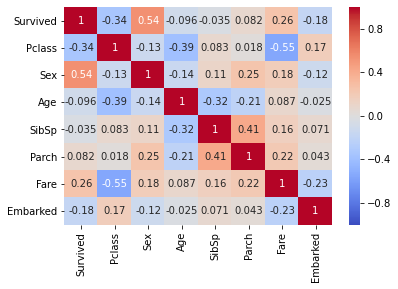

In [33]:
sns.heatmap(Titanic_data_final.corr(),vmin=-1, vmax=1, cmap='coolwarm',annot=True)

In [34]:
Titanic_data_final.Survived.value_counts()

0    549
1    342
Name: Survived, dtype: int64

# model building

In [35]:
x=Titanic_data_final.drop(columns="Survived")
x.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,,
1,3,0,22.0,1,0,7.2500,2
2,1,1,38.0,1,0,71.2833,0
3,3,1,26.0,0,0,7.9250,2
4,1,1,35.0,1,0,53.1000,2
5,3,0,35.0,0,0,8.0500,2


In [36]:
y=Titanic_data_final[["Survived"]]
y.head()

,Survived
PassengerId,
1,0
2,1
3,1
4,1
5,0


In [37]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,train_size=.80,random_state=7)

In [38]:
ytrain=ytrain.Survived.ravel()
ytest=ytest.Survived.ravel()

# logistic regression 

In [39]:
from sklearn.linear_model import LogisticRegression

In [40]:
logistic_model=LogisticRegression(max_iter=150)

In [41]:
logistic_model=logistic_model.fit(xtrain,ytrain)

In [42]:
logit_predict_train=logistic_model.predict(xtrain)

In [43]:
accuracy_score(ytrain,logit_predict_train)

0.7991573033707865

In [44]:
logit_predict_test=logistic_model.predict(xtest)

In [45]:
accuracy_score(ytest,logit_predict_test)

0.8212290502793296

In [46]:
#for i in range (2,20):
    
score=cross_val_score(logistic_model,xtrain,ytrain,cv=3)
score.mean()

0.792191138058599

# RFC

In [47]:
 from sklearn.ensemble import RandomForestClassifier

In [48]:
RFRmodel=RandomForestClassifier()

In [49]:
RFRmodel=RFRmodel.fit(xtrain,ytrain)

In [50]:
rfr_train_preict=RFRmodel.predict(xtrain)

In [51]:
accuracy_score(ytrain,rfr_train_preict)

0.9929775280898876

In [52]:
rfr_test_preict=RFRmodel.predict(xtest)

In [53]:
accuracy_score(ytest,rfr_test_preict)

0.8435754189944135

# RFC with grid

In [54]:
grid=GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'n_estimators': [50, 100,200], 'criterion': ('gini', 'entropy'),
                        'max_depth':[3,4,5]},cv=5)

In [55]:
grid=grid.fit(xtrain,ytrain)

In [56]:
grid.best_params_

{'criterion': 'entropy', 'max_depth': 3, 'n_estimators': 200}

In [57]:
RFRmodel2=RandomForestClassifier(criterion ='gini', max_depth= 4, n_estimators= 50)

In [58]:
RFRmodel2=RFRmodel.fit(xtrain,ytrain)

In [59]:
rfr_train_preict2=RFRmodel2.predict(xtrain)

In [60]:
accuracy_score(ytrain,rfr_train_preict2)

0.9929775280898876

In [61]:
rfr_test_preict2=RFRmodel2.predict(xtest)

In [62]:
accuracy_score(ytest,rfr_test_preict2)

0.8547486033519553

# Boosting Algo

In [63]:
gbmodel=GradientBoostingClassifier()

In [64]:
gbmodel=gbmodel.fit(xtrain,ytrain)

In [65]:
gbmodel_predict_train=gbmodel.predict(xtrain)

In [66]:
accuracy_score(ytrain,gbmodel_predict_train)

0.9002808988764045

In [67]:
gbmodel_predict_test=gbmodel.predict(xtest)

In [68]:
accuracy_score(ytest,gbmodel_predict_test)

0.8715083798882681

In [69]:
gridrf=GridSearchCV(estimator=GradientBoostingClassifier(),
             param_grid={'loss': ('deviance', 'exponential'), 'learning_rate': [.1,.2,.3,.4,.5],
                        'n_estimators':[50,100,150],
                        'min_samples_split':[3,4,5],'min_samples_leaf':[2,3,4,4],
                        'max_depth':[2,3,4,5]},cv=5)

In [71]:
gridrf=gridrf.fit(xtrain,ytrain)

KeyboardInterrupt: 

In [ ]:
gridrf.best_params_

In [74]:
gbmodel2=GradientBoostingClassifier(learning_rate= 0.3,max_depth= 4, min_samples_leaf= 9,
 min_samples_split= 3,n_estimators= 50)

In [75]:
gbmodel2=gbmodel2.fit(xtrain,ytrain)

In [76]:
gbmodel_predict_train2=gbmodel2.predict(xtrain)

In [77]:
accuracy_score(ytrain,gbmodel_predict_train2)

0.9297752808988764

In [78]:
gbmodel_predict_test2=gbmodel2.predict(xtest)

In [79]:
accuracy_score(ytest,gbmodel_predict_test2)

0.8770949720670391

In [80]:
score=cross_val_score(gbmodel2,xtrain,ytrain,cv=5)
print(score.mean())

0.800640204865557


In [81]:
score=cross_val_score(gbmodel2,xtest,ytest,cv=5)
print(score.mean())

0.7765079365079364


In [82]:
Test=pd.read_csv("Test.csv")
Test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [83]:
Test=Test.set_index("PassengerId")
Test.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,
892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [84]:
Test.drop(columns=["Name","Ticket","Cabin"],inplace=True)

In [85]:
Test["Sex"]=pd.get_dummies(data=Test.Sex)
#male=0,female=1

In [86]:
Test

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,,
892,3,0,34.5,0,0,7.8292,Q
893,3,1,47.0,1,0,7.0000,S
894,2,0,62.0,0,0,9.6875,Q
895,3,0,27.0,0,0,8.6625,S
896,3,1,22.0,1,1,12.2875,S
...,...,...,...,...,...,...,...
1305,3,0,NaN,0,0,8.0500,S
1306,1,1,39.0,0,0,108.9000,C
1307,3,0,38.5,0,0,7.2500,S


In [87]:
Test.Embarked=Test.Embarked.astype('category')

In [88]:
Test.Embarked=Test.Embarked.cat.codes
#c=0,q=1,s=1

In [89]:
Test

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,,
892,3,0,34.5,0,0,7.8292,1
893,3,1,47.0,1,0,7.0000,2
894,2,0,62.0,0,0,9.6875,1
895,3,0,27.0,0,0,8.6625,2
896,3,1,22.0,1,1,12.2875,2
...,...,...,...,...,...,...,...
1305,3,0,NaN,0,0,8.0500,2
1306,1,1,39.0,0,0,108.9000,0
1307,3,0,38.5,0,0,7.2500,2


In [92]:
Test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 892 to 1309
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Sex       418 non-null    uint8  
 2   Age       332 non-null    float64
 3   SibSp     418 non-null    int64  
 4   Parch     418 non-null    int64  
 5   Fare      417 non-null    float64
 6   Embarked  418 non-null    int8   
dtypes: float64(2), int64(3), int8(1), uint8(1)
memory usage: 20.4 KB


In [96]:
Test.Fare=Test.Fare.fillna(Test.Fare.mean())

In [128]:
Test

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,,
892,3,0,34.5,0,0,7.8292,1
893,3,1,47.0,1,0,7.0000,2
894,2,0,62.0,0,0,9.6875,1
895,3,0,27.0,0,0,8.6625,2
896,3,1,22.0,1,1,12.2875,2
...,...,...,...,...,...,...,...
1305,3,0,NaN,0,0,8.0500,2
1306,1,1,39.0,0,0,108.9000,0
1307,3,0,38.5,0,0,7.2500,2


In [119]:
impute_age=Test[np.isnan(Test.Age)]
impute_age

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,,
902,3,0,NaN,0,0,7.8958,2
914,1,1,NaN,0,0,31.6833,2
921,3,0,NaN,2,0,21.6792,0
925,3,1,NaN,1,2,23.4500,2
928,3,1,NaN,0,0,8.0500,2
...,...,...,...,...,...,...,...
1300,3,1,NaN,0,0,7.7208,1
1302,3,1,NaN,0,0,7.7500,1
1305,3,0,NaN,0,0,8.0500,2


In [120]:
impute_age_test=impute_age.drop(columns="Age")

In [122]:
impute_age_test

,Pclass,Sex,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,
902,3,0,0,0,7.8958,2
914,1,1,0,0,31.6833,2
921,3,0,2,0,21.6792,0
925,3,1,1,2,23.4500,2
928,3,1,0,0,8.0500,2
...,...,...,...,...,...,...
1300,3,1,0,0,7.7208,1
1302,3,1,0,0,7.7500,1
1305,3,0,0,0,8.0500,2


In [123]:
age_predict=imputemodel.predict(impute_age_test)

In [125]:
age_predict=age_predict.round(2)

In [126]:
impute_age_test["Age"]=age_predict

In [127]:
impute_age_test

,Pclass,Sex,SibSp,Parch,Fare,Embarked,Age
PassengerId,,,,,,,
902,3,0,0,0,7.8958,2,27.21
914,1,1,0,0,31.6833,2,38.98
921,3,0,2,0,21.6792,0,23.23
925,3,1,1,2,23.4500,2,17.15
928,3,1,0,0,8.0500,2,25.35
...,...,...,...,...,...,...,...
1300,3,1,0,0,7.7208,1,17.67
1302,3,1,0,0,7.7500,1,22.34
1305,3,0,0,0,8.0500,2,30.50


In [129]:
Test=Test[(pd.notnull(Test.Age))]
Test

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,,
892,3,0,34.5,0,0,7.8292,1
893,3,1,47.0,1,0,7.0000,2
894,2,0,62.0,0,0,9.6875,1
895,3,0,27.0,0,0,8.6625,2
896,3,1,22.0,1,1,12.2875,2
...,...,...,...,...,...,...,...
1301,3,1,3.0,1,1,13.7750,2
1303,1,1,37.0,1,0,90.0000,1
1304,3,1,28.0,0,0,7.7750,2


In [132]:
final_test_value=pd.concat([Test,impute_age_test])

In [133]:
final_test_value.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 892 to 1309
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Sex       418 non-null    uint8  
 2   Age       418 non-null    float64
 3   SibSp     418 non-null    int64  
 4   Parch     418 non-null    int64  
 5   Fare      418 non-null    float64
 6   Embarked  418 non-null    int8   
dtypes: float64(2), int64(3), int8(1), uint8(1)
memory usage: 20.4 KB


In [141]:
predict_final=gbmodel2.predict(final_test_value)

In [142]:
final_test_value

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,,
892,3,0,34.50,0,0,7.8292,1
893,3,1,47.00,1,0,7.0000,2
894,2,0,62.00,0,0,9.6875,1
895,3,0,27.00,0,0,8.6625,2
896,3,1,22.00,1,1,12.2875,2
...,...,...,...,...,...,...,...
1300,3,1,17.67,0,0,7.7208,1
1302,3,1,22.34,0,0,7.7500,1
1305,3,0,30.50,0,0,8.0500,2


In [145]:
final_test_value=final_test_value.reset_index()

In [146]:
final_test_value

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,892,3,0,34.50,0,0,7.8292,1
1,893,3,1,47.00,1,0,7.0000,2
2,894,2,0,62.00,0,0,9.6875,1
3,895,3,0,27.00,0,0,8.6625,2
4,896,3,1,22.00,1,1,12.2875,2
...,...,...,...,...,...,...,...,...
413,1300,3,1,17.67,0,0,7.7208,1
414,1302,3,1,22.34,0,0,7.7500,1
415,1305,3,0,30.50,0,0,8.0500,2
416,1308,3,0,30.50,0,0,8.0500,2


In [147]:
final_test_value['Survived']=predict_final

In [150]:
submission=final_test_value[["PassengerId","Survived"]]

In [151]:
submission

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0
...,...,...
413,1300,1
414,1302,1
415,1305,0
416,1308,0


In [153]:
submission.to_csv("gender_submission.csv",index=False)